# Churn Prediction Models

# 1. Logistic Regression Churn Prediction Models

## Importing Libraries

In [1]:
from sklearn import linear_model
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px

## Data Inspection & Cleaning

In [2]:
#Importing the dataset and looking at the attributes of the dataset

df = pd.read_csv('data_regression.csv')
df.columns

Index(['year', 'customer_id', 'phone_no', 'gender', 'age',
       'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

In [3]:
df.head(10)

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
5,2015,101953,329-6603,NaN,31,65,no,no,193.65,12.7,21.95,111,6,4.0,4,1.0
6,2015,103051,416-1845,NaN,54,59,no,no,239.25,10.2,27.12,106,4,NaN,0,0.0
7,2015,103225,348-7193,Female,40,50,no,no,196.65,5.6,22.29,88,9,NaN,5,1.0
8,2015,103408,413-4039,Male,61,205,no,yes,263.70,7.8,29.89,64,5,3.0,2,0.0
9,2015,103676,338-5207,Male,31,63,no,no,316.80,12.3,35.90,58,2,4.0,0,0.0


We can see that the gender and maximum_days_inactive is having the NAN values. Gender, screen, and mail are categorical variables. There are also other behavioural variables like weekly_mins_wathced, minimum_daily_mins, maximum_daily_mins, weekly_max_night_mins, videos_watched, maximum_days_inactive, customer_support_calls, and churn.

In [4]:
#Defining Inspection and Cleaning function

def inspection(df):
    
    import pandas as pd
    import seaborn as sns
    
    print('Types of variables we are working with: ')
    print(df.dtypes, "\n")
    
    print('Total number of samples with missing values')
    print(df.isnull().any(axis=1).sum(), "\n")
    
    print('Total missing variables per attribute/column')
    print(df.isnull().sum(), "\n")
    
    print('Map of missing values')
    sns.heatmap(df.isnull())

Types of variables we are working with: 
year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object 

Total number of samples with missing values
82 

Total missing variables per attribute/column
year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_m

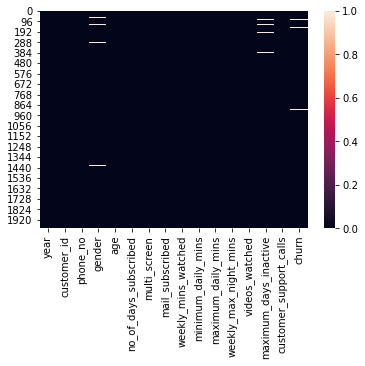

In [5]:
inspection(df)

From the heatmap, it doesn't seems like that there is lot of missing data. There are some values for Churn coloumn which are missing. Mostly, those are in the first 1000 samples. Few values of gneder and maximum_days_inactive are also missing. These can be seen in first half of the data. There is not much missing data, but again we need to get rid of the data which is holding null values. So, we will remove all the rows with missing values from the data frame.

In [6]:
#Using dropna to remove missing values

df = df.dropna()
df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,2015,993714,364-1969,Male,32,61,no,no,67.50,9.8,7.65,94,6,3.0,2,0.0
1991,2015,993815,387-5891,Male,49,50,yes,yes,460.65,8.0,52.21,109,3,3.0,0,0.0
1992,2015,994954,329-3222,Female,42,119,no,yes,176.70,7.6,20.03,76,3,3.0,3,0.0
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0


In [7]:
df.describe()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,1918.0,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000
mean,2015.0,562267.639208,38.659020,100.065693,269.919291,10.180553,30.591413,100.400938,4.484880,3.247132,1.539625,0.131908
std,0.0,257172.549309,10.150896,39.923242,80.541705,2.771199,9.128036,19.569822,2.477764,0.805840,1.300553,0.338479
min,2015.0,100198.000000,18.000000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,341491.750000,32.000000,73.000000,218.587500,8.400000,24.775000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,2015.0,579594.500000,37.000000,99.000000,269.550000,10.200000,30.550000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,2015.0,778377.250000,43.000000,127.000000,324.000000,12.000000,36.720000,114.000000,6.000000,4.000000,2.000000,0.000000
max,2015.0,999961.000000,82.000000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


Attribute year is having a zero standard deviation because all the elements of attribute year are same, i.e. the year 2015. The dataset contains only the data about the customers who were there on the platform during the year 2015. There are 1918 rows, i.e. 1918 customers in total. This is after we remove the null values from the dataset. Age of the customer varies from 18 to 82. The main attribute used to describe if the customer churned or not is based on maximum days the customer was inactive. The minimum value for this attribute is 0, which is reasonable as some of the customers may not be inactive on the platform, but the maximum value is 6, i.e. some of the customers were inactive for longer time and result into  getting churned. This description says a lot about the customers, i.e. the average customers were of age 38-39 and on a average 0.13% of customers are getting churned.

In [8]:
#Printing the correlation matrix
corr = df.corr()
corr

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,NaN,1.000000,0.021881,-0.019180,-0.010410,0.040254,-0.010415,0.000648,0.061229,0.047551,-0.034940,-0.054260
age,NaN,0.021881,1.000000,0.035426,0.019586,-0.008557,0.019598,0.015150,-0.003876,0.001507,-0.002848,0.015982
no_of_days_subscribed,NaN,-0.019180,0.035426,1.000000,-0.002089,0.015247,-0.002095,0.001290,0.012856,0.017720,0.011272,0.009627
weekly_mins_watched,NaN,-0.010410,0.019586,-0.002089,1.000000,-0.015180,1.000000,0.039856,0.027869,-0.012410,-0.031239,0.165991
minimum_daily_mins,NaN,0.040254,-0.008557,0.015247,-0.015180,1.000000,-0.015178,0.011446,0.046493,0.931296,-0.003817,0.072308
maximum_daily_mins,NaN,-0.010415,0.019598,-0.002095,1.000000,-0.015178,1.000000,0.039858,0.027870,-0.012410,-0.031250,0.165989
weekly_max_night_mins,NaN,0.000648,0.015150,0.001290,0.039856,0.011446,0.039858,1.000000,-0.003355,0.032647,-0.013568,0.006029
videos_watched,NaN,0.061229,-0.003876,0.012856,0.027869,0.046493,0.027870,-0.003355,1.000000,0.026169,-0.009850,-0.018457
maximum_days_inactive,NaN,0.047551,0.001507,0.017720,-0.012410,0.931296,-0.012410,0.032647,0.026169,1.000000,-0.006362,0.046809


## Encoding Categorical Variables

In [9]:
df.head(5)

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


We can see our dataset has 3 categorical variables, i.e. gender, multi_screen, and mail_subscribed. We can look at the unique values of each attribute as follows

In [10]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [11]:
df.multi_screen.unique()

array(['no', 'yes'], dtype=object)

In [12]:
df.mail_subscribed.unique()

array(['no', 'yes'], dtype=object)

In [13]:
#Function for encoding categorical variables using scikit learn function called as ordinal encoder

def enc_cat (df, variables):
    from sklearn.preprocessing import OrdinalEncoder
    ord_enc = OrdinalEncoder()
    
    for v in variables:
        name = v+'_code'
        df[name] = ord_enc.fit_transform(df[[v]])
        print('The encoded values for ' + v +' are: ')
        print(df[name].unique())

In [14]:
enc_cat(df, ['gender', 'multi_screen', 'mail_subscribed'])

The encoded values for gender are: 
[0. 1.]
The encoded values for multi_screen are: 
[0. 1.]
The encoded values for mail_subscribed are: 
[0. 1.]


In [15]:
df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,gender_code,multi_screen_code,mail_subscribed_code
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0,0.0,0.0,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0,0.0,0.0,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0,0.0,0.0,0.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0,0.0,0.0,1.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,2015,993714,364-1969,Male,32,61,no,no,67.50,9.8,7.65,94,6,3.0,2,0.0,1.0,0.0,0.0
1991,2015,993815,387-5891,Male,49,50,yes,yes,460.65,8.0,52.21,109,3,3.0,0,0.0,1.0,1.0,1.0
1992,2015,994954,329-3222,Female,42,119,no,yes,176.70,7.6,20.03,76,3,3.0,3,0.0,0.0,0.0,1.0
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0,1.0,0.0,0.0


We can see that three new variables are created at the end of the dataframe called as gender_code, multi_screen_code, and mail_subscribed_code. All of those have only two types of values, i.e. 0 & 1.

## Exploratory Data Analysis

In [16]:
#Function to return scatterplots of all the variables in the dataset against the classification variable

def plot1(df, cols_to_exclude, class_col):
    
    import numpy as np
    import seaborn as sns
    import warnings
    
    warnings.filterwarnings('ignore')
    
    #cleaning up of non-numerical columns
    cols = df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical cols from df
    X = df[cols]                                                #creating df only with numerical cols
    X = X[X.columns.difference(cols_to_exclude)]                #removing columns to exclude
    
    #function dataframe.columns.difference give the complement of the values that we provide as argument.
    #here we are providing the cols to be excluded list as arg, so it will return all other cols other than those
    
    for col in X.columns.difference([class_col]):               #selecting all cols in list except the churn col
        g = sns.FacetGrid(df)                                   
        
        #Facetgrid maps dataset onto multiple axes arrayed in a grid of rows or columns that correspond to levels of variables
        #in the dataset. Here we have only two variables compared at a time, so it is not using hue.
        
        #Applying a plot function to each facet's subset of the data
        g.map(sns.scatterplot, col, class_col)

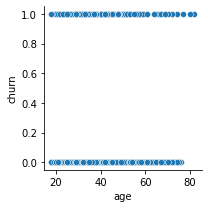

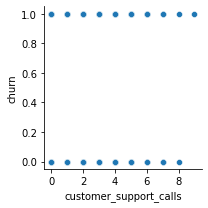

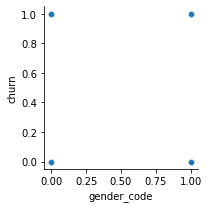

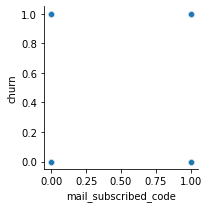

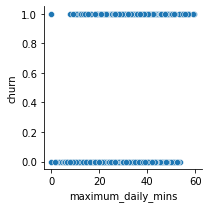

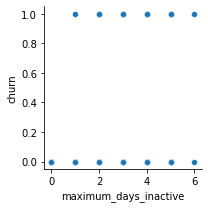

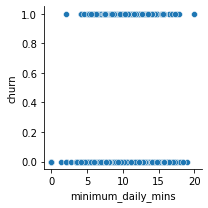

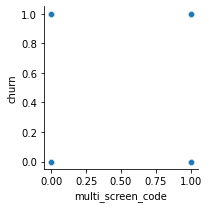

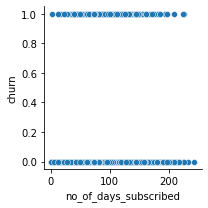

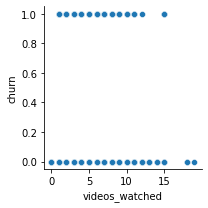

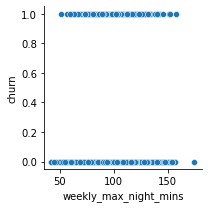

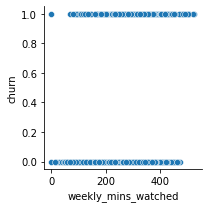

In [17]:
plot1(df, ['customer_id', 'phone_no', 'year'], 'churn')

Unfortunately, it can be seen from the graph that there aren't a many obvious patterns when it comes to logistic regression. For example, if we see tha above graph for churn vs weekly_mins_watched, we can see that people that churn and do not churn are all ober the scale. Similarly, the graph for weekly_max_night_mins, videos_watched, no_of_days_subscribed, minimum_daily_mins, etc have when compared with churn.

In [18]:
#Function to return the pair-plots of classification variable versus all other variables

def plot2(df, class_col, cols_to_exclude):
    
    import numpy as np
    import seaborn as sns
    
    #cleaning up of non-numerical columns
    cols = df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical cols from df
    X = df[cols]                                                #creating df only with numerical cols
    X = X[X.columns.difference(cols_to_exclude)]                #removing columns to exclude
    
    #function dataframe.columns.difference give the complement of the values that we provide as argument.
    #here we are providing the cols to be excluded list as arg, so it will return all other cols other than those
    
    sns.pairplot(df, hue = class_col)

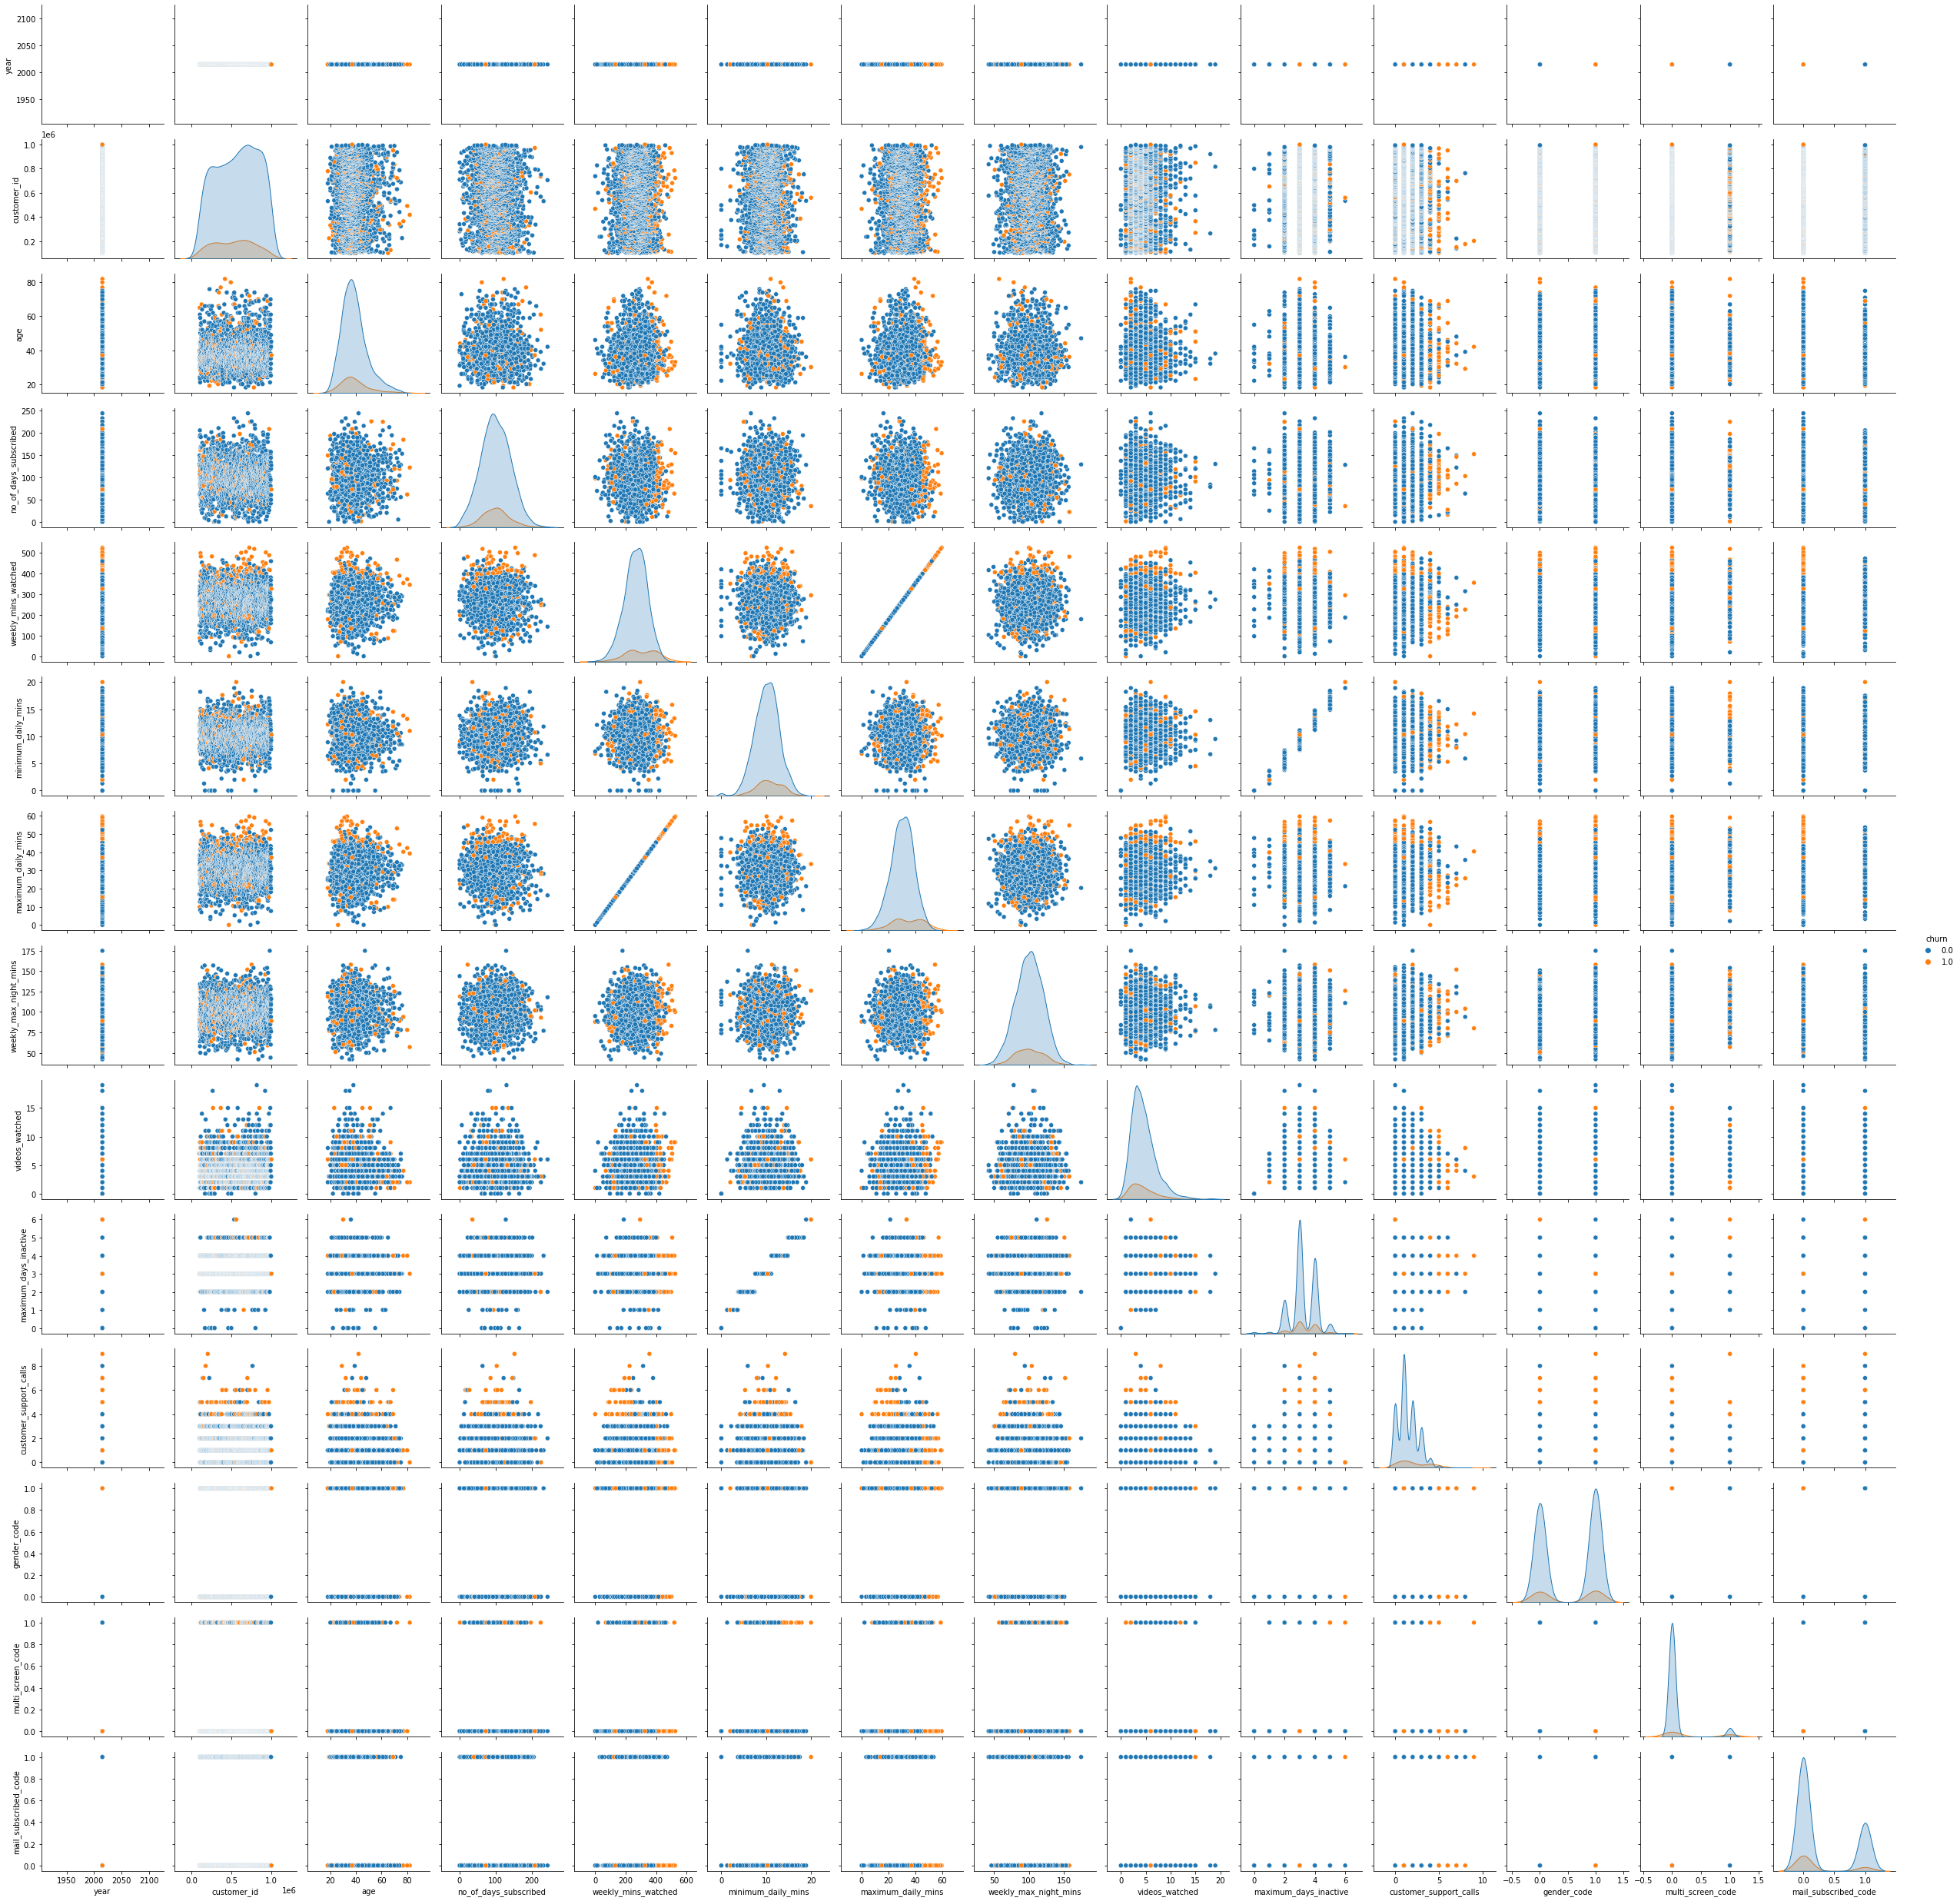

In [19]:
plot2(df, class_col='churn', cols_to_exclude=['customer_id', 'phone_no', 'year'])

This is the pair-plot of all the variables against each other. The diagonal graphs are all histograms. The one with orange dots are the customers who got churned and the blue ones were not churned.   

For example, if we check the graph of weekkly_mins_watched versus weekly_max_night_mins, we can see that more people got churned when weekly_mins_watched went beyond a certain limit. This can be an explanation for the situation where people are coming on the platform to watch one particular series and then are getting churned.

Similarly, if we see the graph of maximum_daily_mins and weekly_mins_watched we can see that there is a linear relation which is growing increasingly. As the people are on the platform for few weeks their daily watch time is also increasing and most of them are getting churned when they are on the platform for long time or beyond some limit.

Also, when we see the relation between other variables and the encoded variables it will only show data points at values 0 and 1. This is because these variables were encoded with the values 0 and 1. 

There is one more relation which is noticeable, i.e. as the minimum_daily_mins are increasing from 0 to 20 the maximum_days_inactive count is increasing from 0 to 6. Some people still stay on the platform and some of them get churned.

## Running Logistic Regression

### 1. Running model using statsmodels.api 

In [20]:
def logistic_regression(df, class_col, cols_to_exclude):
    
    #cleaning the dataframe for logistic regression with the columns which we're not using, i.e. phone no, customer_id, & year
    cols = df.select_dtypes(include=np.number).columns.tolist()
    X = df[cols]
    X = X[X.columns.difference(cols_to_exclude)]
    X = X[X.columns.difference([class_col])]
    
    #We're running the logistic regression here using two ways:
    # 1. Using statsmodels.api library which bring the coeff with itself and is easy to visualize
    # 2. Using sklearn for logistic regression
    
    # 1.
    import statsmodels.api as sm
    y = df[class_col]
    logit_1 = sm.Logit(y, X)
    result_1 = logit_1.fit()
    print(result_1.summary2())

In [21]:
logistic_regression(df, class_col = 'churn', cols_to_exclude=['customer_id', 'phone_no', 'year'])

Optimization terminated successfully.
         Current function value: 0.336585
         Iterations 7
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.137     
Dependent Variable:   churn              AIC:                1315.1404 
Date:                 2022-06-23 02:50   BIC:                1381.8488 
No. Observations:     1918               Log-Likelihood:     -645.57   
Df Model:             11                 LL-Null:            -748.02   
Df Residuals:         1906               LLR p-value:        7.1751e-38
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------------
age                    -0.0208   0.0068 -3.0739 0.0021  -0.0340

We can see that the model iterated 7 times to reach the best optimization. Maximum number of iterations using Logit for statsmodels.api is 35, after this optimization fails. The value of log-likelihood is -645.57, i.e. we get our best logistic regression model at this value of LL. Also, the Psuedo R-squared value is very low, i.e. 13.7% which is not good and it says that our choice of model is not good. 

According to the p-values, gender_code, maximum_daily_mins, and weekly_mins_watched are not significant.

In [22]:
#Interpreting coefficients of age

import math
math.exp(-0.0208)

0.9794148279480585

This means that an addition of year in customers age increases the odds of churning by 0.97. This is not a lot.

In [23]:
#Interpreting coefficients of multi_screen_code

import math
math.exp(1.9511)

7.036423390843554

This shows that having a multi_scree_code changes the odd of churning by 7.03% and also the p-value of this attribute shows that it is very significant as it is 0.0000.

### 2. Running model using sklearn

In [24]:
def prep_model(df, class_col, cols_to_exclude):
    
    from sklearn.model_selection import train_test_split
    import numpy as np
    
    #cleaning the dataframe for logistic regression with the columns which we're not using, i.e. phone no, customer_id, & year
    cols = df.select_dtypes(include=np.number).columns.tolist()
    X = df[cols]
    X = X[X.columns.difference(cols_to_exclude)]
    X = X[X.columns.difference([class_col])]
    
    y = df[class_col]
    
    #Declaring globally so that we can call this variables outside this function also.
    global X_train, X_test, y_train, y_test 
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [25]:
def running_model(X_train, X_test, y_train, y_test):
    
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score, classification_report
    
    #Defining the logistic model globally to use it outside the function
    global logreg 
    
    #Fitting the logistic regression model from sklearn
    logreg = LogisticRegression(random_state = 13)
    logreg.fit(X_train, y_train)
    
    #Predicting y values
    global y_pred #Defining globally to use outside the function
    
    y_pred = logreg.predict(X_test)
    
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    
    print(classification_report(y_test, y_pred))
    print('The area under the curve is: %0.2f'%logit_roc_auc)

## Model Evaluation

In [26]:
prep_model(df, class_col='churn', cols_to_exclude=['customer_id', 'phone_no', 'year'])

In [27]:
running_model(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       513
         1.0       0.47      0.13      0.20        63

    accuracy                           0.89       576
   macro avg       0.69      0.55      0.57       576
weighted avg       0.85      0.89      0.86       576

The area under the curve is: 0.55


First we executed the prep_model function to define our training and test sets as per the function. Then we executed running_model function using the training and testing sets.

The precision, recall and f1-score for our prediction is not that good as per the model. Infact the accuracy is very good, so that means our model is predicting properly which customers are not getting churned, but it is not predicting that accuractely which customers are getting churned. Also, the area under the curve is 0.55 which is not that good as the worst model has 0.5 AUC.

In [28]:
#Confusion matrix

def conf_mat(y_test, y_pred):
    from sklearn.metrics import confusion_matrix
    
    confusion_matrix = confusion_matrix(y_test, y_pred)
    print(confusion_matrix)
    
    tn, fp, fn, tp = confusion_matrix.ravel()
    print('TN: %0.2f'%tn)
    print('FP: %0.2f'%fn)
    print('FN: %0.2f'%fn)
    print('TP: %0.2f'%tp)

In [29]:
#ROC Curve

def roc_cur(logreg, X_test, y_test):
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict(X_test))
    
    #Creating Graph
    plt.figure()
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    #Plotting the worst ROC model
    plt.plot([0, 1], [0, 1], 'b--')
    
    #Plotting the logistic regression which we have built
    plt.plot(fpr, tpr, color='darkorange', label='Logistic Regression (area = %0.2f)'%logit_roc_auc)
    
    #Adding labels and titles
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.savefig('LogROC')
    plt.show()

In [30]:
conf_mat(y_test, y_pred)

[[504   9]
 [ 55   8]]
TN: 504.00
FP: 55.00
FN: 55.00
TP: 8.00


Our TN = 504, TP = 8, this is the reason our model is not good.

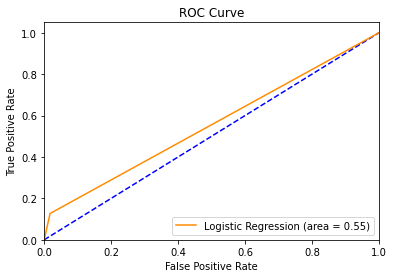

In [31]:
roc_cur(logreg, X_test, y_test)

This curve shows that our logistic regression model is not very far from the worst model, hence our model choice is not that good.

## Dealing with Class Imbalance

In [32]:
df['churn'].describe()

count    1918.000000
mean        0.131908
std         0.338479
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: churn, dtype: float64

In this project we're trying to predict how many customers are getting churned from the platform. So, the churn attribute is our dependent variable. When we describe this attribute we can see that our mean is 0.13, i.e. 13% which says that amount of people getting churned for the year 2015 are only 13%. This bring in the issue of class imbalance and for the same reason our model doesn't works well on this dataset.

#### 1. Dealing with class imbalance using class_weight = balanced in LogisticRegression function of sklearn

In [33]:
def run_model_bweights(X_train, X_test, y_train, y_test):
    
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score, classification_report
    
    #Defining the logistic model globally to use it outside the function
    global logreg 
    
    #Fitting the logistic regression model from sklearn
    logreg = LogisticRegression(random_state = 13, class_weight = 'balanced') #here we're adding an extra attribute for balanced class weights
    logreg.fit(X_train, y_train)
    
    #Predicting y values
    global y_pred #Defining globally to use outside the function
    
    y_pred = logreg.predict(X_test)
    
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    
    print(classification_report(y_test, y_pred))
    print('The area under the curve is: %0.2f'%logit_roc_auc)

Using class_weight = 'balanced' the model either decreases the weight of the majority class or increases the weight of the minority class.

In [34]:
run_model_bweights(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

         0.0       0.96      0.74      0.84       513
         1.0       0.27      0.78      0.40        63

    accuracy                           0.74       576
   macro avg       0.62      0.76      0.62       576
weighted avg       0.89      0.74      0.79       576

The area under the curve is: 0.76


Now, we can see that our results are more better. We have lower precision and better recall, as a result, the AUC is 76%. This is a better model than the one which we executed above. Our F1-Score increased, but the accuracy had a dip of few percentages.

#### 2. Dealing with class imbalance using class_weight = w as argument in LogisticRegression function of sklearn to pass our own tuned weights

In [35]:
def run_model_aweights(X_train, X_test, y_train, y_test, w):
    
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score, classification_report
    
    #Defining the logistic model globally to use it outside the function
    global logreg 
    
    #Fitting the logistic regression model from sklearn
    
    #here we're adding an extra attribute for our own passed class weights
    logreg = LogisticRegression(random_state = 13, class_weight = w) 
    logreg.fit(X_train, y_train)
    
    #Predicting y values
    global y_pred #Defining globally to use outside the function
    
    y_pred = logreg.predict(X_test)
    
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    
    print(classification_report(y_test, y_pred))
    print('The area under the curve is: %0.2f'%logit_roc_auc)

In [36]:
run_model_aweights(X_train, X_test, y_train, y_test, {0:90, 1:10})

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       513
         1.0       1.00      0.02      0.03        63

    accuracy                           0.89       576
   macro avg       0.95      0.51      0.49       576
weighted avg       0.90      0.89      0.84       576

The area under the curve is: 0.51


Now, we can see our precision is really good, recall, F1-score and AUC is not good, but accuracy is better than earlier one.

#### 3. Dealing with class imbalance using bootstraps for minority/majority class or resampling from majority/minority class

In [37]:
def adjust_imbalance(X_train, y_train, class_col):
    
    from sklearn.utils import resample #used to resample array or matrix in consistent way
    import pandas as pd
    X = pd.concat([X_train, y_train], axis=1)
    
    #seperating 2 classes
    class0 = X[X[class_col]==0]
    class1 = X[X[class_col]==1]
    
    #Case 1 - bootstrapping from minority class - used to convert the minority class into the size of majority class
    if len(class1) < len(class0):
        resampled = resample(class1, replace=True, n_samples=len(class0), random_state=10)
        resampled_df = pd.concat([resampled, class0])
        
    #Case 2 -  Resampling from the majority class - used to cut cases from majority class until it has size of minority class
    else:
        resampled = resample(class1, replace=False, n_samples=len(calss0), random_state=10)
        resampled_df = pd.concat([resampled, class0])
        
    return resampled_df

Above function will generate a resampled dataframe and we can run the model on resampled dataframe.

In [38]:
resampled_df = adjust_imbalance(X_train, y_train, class_col = 'churn')

In [39]:
prep_model(resampled_df, class_col = 'churn', cols_to_exclude = ['customer_id', 'phone_no', 'year'])
running_model(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

         0.0       0.67      0.75      0.71       339
         1.0       0.73      0.65      0.69       353

    accuracy                           0.70       692
   macro avg       0.70      0.70      0.70       692
weighted avg       0.70      0.70      0.70       692

The area under the curve is: 0.70


This method gives us less accuracy but better AUC. The precision, recall and f1-score is also good here.

#### 4. Dealing with class imbalance using smote

In [40]:
#Synthetic Minority Optimization Technique. Generated new instances from existing minority cases that supply as input.

def prep_model_smote(df, class_col, cols_to_exclude):
    
    from sklearn.model_selection import train_test_split
    import numpy as np
    from imblearn.over_sampling import SMOTE
    
    #cleaning the dataframe for logistic regression with the columns which we're not using, i.e. phone no, customer_id, & year
    cols = df.select_dtypes(include=np.number).columns.tolist()
    X = df[cols]
    X = X[X.columns.difference(cols_to_exclude)]
    X = X[X.columns.difference([class_col])]
    
    y = df[class_col]
    
    #Declaring globally so that we can call this variables outside this function also.
    global X_train, X_test, y_train, y_test 
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
    
    sm = SMOTE(random_state=0, sampling_strategy=1.0)
    X_train, y_train = sm.fit_sample(X_train, y_train)

In [41]:
prep_model_smote(df, class_col = 'churn', cols_to_exclude = ['customer_id', 'phone_no', 'year'])
running_model(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

         0.0       0.96      0.72      0.82       513
         1.0       0.25      0.76      0.37        63

    accuracy                           0.72       576
   macro avg       0.60      0.74      0.60       576
weighted avg       0.88      0.72      0.77       576

The area under the curve is: 0.74


Using this technique we get area under the curve of 74%, but with lower precision and higher recall.

## Feature Selection

We will try to select best features for our model to increase the accuracy of our model with efficieny. This is beneficial when datasets are large and we can build the best model with less features.

#### 1. Feature Selection using Variance Threshold selection

We only get features which pass a certain variance threshold

In [42]:
class_col = 'churn'
cols_to_exlcude = ['customer_id', 'phone_no', 'year']

def var_threshold_selection(df, cols_to_exclude, class_col, threshold):
    
    from sklearn.feature_selection import VarianceThreshold
    import numpy as np
    from sklearn import preprocessing
    
    #cleaning the dataframe for logistic regression with the columns which we're not using, i.e. phone no, customer_id, & year
    cols = df.select_dtypes(include=np.number).columns.tolist()
    X = df[cols]
    X = X[X.columns.difference(cols_to_exclude)]
    X = X[X.columns.difference([class_col])]
    
    #Scaling Variables
    scaler = preprocessing.StandardScaler().fit(X)
    X_scaled = scaler.transform(X)
    var_thr = VarianceThreshold(threshold = threshold) #removing both constant and quasi-constant
    var_thr.fit(X_scaled)
    var_thr.get_support()
    
    global selected_cols
    selected_cols = X.columns[var_thr.get_support()]
    
    print('The selected features are: ')
    print(list(selected_cols))

In [43]:
var_threshold_selection(df, cols_to_exclude=['customer_id', 'phone_no', 'year'], class_col = 'churn', threshold = 1)

The selected features are: 
['maximum_daily_mins', 'maximum_days_inactive', 'weekly_mins_watched']


In [44]:
prep_model(resampled_df, class_col = 'churn', cols_to_exclude=['customer_id', 'phone_no', 'year', 
                                                               'gender', 'age', 'no_of_days_subscribed', 
                                                               'multi_screen', 'mail_subscribed', 'minimum_daily_mins', 
                                                               'weekly_max_night_mins', 'videos_watched', 
                                                               'customer_support_calls', 'churn', 'gender_code', 
                                                               'multi_screen_code', 'mail_subscribed_code'])
running_model(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

         0.0       0.57      0.62      0.59       339
         1.0       0.60      0.55      0.57       353

    accuracy                           0.58       692
   macro avg       0.58      0.58      0.58       692
weighted avg       0.59      0.58      0.58       692

The area under the curve is: 0.58


This is not that good technique of feature selection as the threshold is not tuned properly and many columns are getting dropped. There is better technique than this which is called as RFE. Above model is similar to the previous one and did not brought a lot of imporvement.

#### 2. Feature Selection using Recursive Feature Eliminations (RFE)

This method exectues several models with different features and eliminates them one by one to see the optimal amount of features.

In [45]:
def rfe_selection(df, cols_to_exclude, class_col, model):
    
    import warnings
    warnings.filterwarnings('ignore')
    
    from sklearn.feature_selection import RFE
    import numpy as np
        
    #cleaning the dataframe for logistic regression with the columns which we're not using, i.e. phone no, customer_id, & year
    cols = df.select_dtypes(include=np.number).columns.tolist()
    X = df[cols]
    X = X[X.columns.difference(cols_to_exclude)]
    X = X[X.columns.difference([class_col])]
    y = df[class_col]
    
    rfe = RFE(model)
    rfe = rfe.fit(X, y)
    
    global selected_cols
    selected_cols = X.columns[rfe.support_]
    
    print('The selected features are: ')
    print(list(selected_cols))

In [46]:
rfe_selection(df, cols_to_exclude=['customer_id', 'phone_no', 'year'], class_col = 'churn', model=logreg)

The selected features are: 
['customer_support_calls', 'gender_code', 'mail_subscribed_code', 'maximum_days_inactive', 'minimum_daily_mins', 'multi_screen_code']


In [47]:
prep_model(resampled_df, class_col = 'churn', cols_to_exclude=['customer_id', 'phone_no', 'year', 
                                                               'gender', 'age', 'no_of_days_subscribed', 
                                                               'multi_screen', 'mail_subscribed', 
                                                               'weekly_max_night_mins', 'gender_code', 
                                                               'multi_screen_code', 'mail_subscribed_code'])
running_model(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

         0.0       0.69      0.71      0.70       339
         1.0       0.71      0.69      0.70       353

    accuracy                           0.70       692
   macro avg       0.70      0.70      0.70       692
weighted avg       0.70      0.70      0.70       692

The area under the curve is: 0.70


This model gives more better result than the earlier one, these results are very much similar to the one where we used resampled_df. It gives the similar results with very less features. So, it's a better model.

## Saving and Running the Model

In [48]:
import pickle
pickle.dump(logreg, open('model1.pk1', 'wb')) #use to dump the logreg model into the file name mentioned in the command

In [49]:
model = pickle.load(open('model1.pk1', 'rb'))

In [50]:
model.predict(X_test) #Sample Prediction

array([1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0.

# 2. Decision Tree Churn Prediction Models

Here, while applying decision tree on the dataset we use the same SMOTE model as used above in the logistic regression. We're using this to avoind class imbalance as discussed above.

In [84]:
#Synthetic Minority Optimization Technique. Generated new instances from existing minority cases that supply as input.

def prep_model_smote_dec_tree(df, class_col, cols_to_exclude):
    
    from sklearn.model_selection import train_test_split
    import numpy as np
    from imblearn.over_sampling import SMOTE
    
    #cleaning the dataframe for logistic regression with the columns which we're not using, i.e. phone no, customer_id, & year
    cols = df.select_dtypes(include=np.number).columns.tolist()
    global X
    #X = df[cols]
    #X = X[X.columns.difference(cols_to_exclude)]
    #X = X[X.columns.difference([class_col])]
    X1 = pd.DataFrame(df)
    X1 = df[['age', 'customer_support_calls', 'gender_code', 'mail_subscribed_code', 'maximum_daily_mins', 'maximum_days_inactive',
           'minimum_daily_mins', 'multi_screen_code', 'no_of_days_subscribed', 'videos_watched', 'weekly_max_night_mins', 'weekly_mins_watched']]
    
    global y
    y = df[class_col]
    
    #Declaring globally so that we can call this variables outside this function also.
    global X1_train, X1_test, y1_train, y1_test 
    
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.3, random_state = 0)
    
    sm = SMOTE(random_state=0, sampling_strategy=1.0)
    X1_train, y1_train = sm.fit_sample(X1_train, y1_train)

In [85]:
def running_model_decision_tree(X1_train, X1_test, y1_train, y1_test):
    
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import roc_auc_score, classification_report
    
    global decisiontree #Defines decision tree model as global model to use outside the function
    
    #Fitting Decision Tree
    decisiontree = DecisionTreeClassifier(random_state = 12, criterion = 'entropy')
    decisiontree.fit(X1_train, y1_train)
    
    #Predicting y values
    global dec_y_pred
    dec_y_pred = decisiontree.predict(X1_test)
    
    decisiontree_roc_auc = roc_auc_score(y1_test, decisiontree.predict(X1_test))
    
    global feature_names
    features = decisiontree.n_features_in_
    #print(features)
    #feature_names = decisiontree.feature_names_in_
    
    print(classification_report(y1_test, dec_y_pred))
    
    print('The area under the curve is %0.2f'%decisiontree_roc_auc)
    

In [86]:
prep_model_smote_dec_tree(df, class_col = 'churn', cols_to_exclude=['customer_id', 'phone_no', 'year'])

In [87]:
running_model_decision_tree(X1_train, X1_test, y1_train, y1_test)

              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92       513
         1.0       0.41      0.62      0.50        63

    accuracy                           0.86       576
   macro avg       0.68      0.76      0.71       576
weighted avg       0.89      0.86      0.87       576

The area under the curve is 0.76


We can see that just by using Decision Tree our are under the curve is 75% with better recall and precision values. The value of AUC is much better than the same value for logistic regression.

## Decision Tree Model Evaluation

In [88]:
#ROC Curve Decision Tree

def roc_cur_dt(decisiontree, X1_test, y1_test):
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    
    decisiontree_roc_auc = roc_auc_score(y1_test, decisiontree.predict(X1_test))
    
    fpr, tpr, thresholds = roc_curve(y1_test, decisiontree.predict(X1_test))
    
    #Creating Graph
    plt.figure()
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    #Plotting the worst ROC model
    plt.plot([0, 1], [0, 1], 'b--')
    
    #Plotting the logistic regression which we have built
    plt.plot(fpr, tpr, color='darkorange', label='Decision Tree (area = %0.2f)'%decisiontree_roc_auc)
    
    #Adding labels and titles
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.savefig('DTroc')
    plt.show()

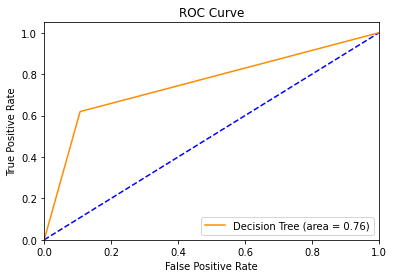

In [75]:
roc_cur_dt(decisiontree, X1_test, y1_test)

The ROC curve gives us the pictorial information about our model. It is better model than the logistic regression and as the area under the curve is better than it.

In [89]:
#Confusion matrix

def conf_mat_dt(y1_test, y1_pred):
    from sklearn.metrics import confusion_matrix
    
    confusion_matrix = confusion_matrix(y1_test, y1_pred)
    print(confusion_matrix)
    
    tn, fp, fn, tp = confusion_matrix.ravel()
    print('TN: %0.2f'%tn)
    print('FP: %0.2f'%fn)
    print('FN: %0.2f'%fn)
    print('TP: %0.2f'%tp)

In [90]:
conf_mat_dt(y1_test, dec_y_pred)

[[458  55]
 [ 24  39]]
TN: 458.00
FP: 24.00
FN: 24.00
TP: 39.00


This confusion matrix is calculated using scikit learn using the automatic threshold of 0.5. We get the expected values from confusion matrix.

## Decision Tree Visualization

In [91]:
#Visualizing decision tree using a plot_tree function

def dec_tree_plot(model, class_names, max_depth=None, figsize=(40, 40), fontsize=1):
    from sklearn import tree
    plt.figure(figsize = figsize)
    tree.plot_tree(decisiontree, 
                   feature_names = decisiontree.feature_names_in_,
                   fontsize = fontsize,
                   max_depth = max_depth, #This param specifies to what depth we want our algo to run, like the depth of nodes.
                   class_names = class_names,
                   filled = True) #This argument colors the tree differently for visualization purpose
    plt.savefig('DecTree Visualization')

In [92]:
dec_tree_plot(decisiontree,['not churn', 'churn'])

AttributeError: 'DecisionTreeClassifier' object has no attribute 'feature_names_in_'

<Figure size 2880x2880 with 0 Axes>

In [ ]:
dec_tree_plot(decisiontree,['not churn', 'churn'], max_depth = 4, figsize=(15, 10), fontsize = 8)

This is the higher level visualization of our decision tree generated using the algorithm. The first split is on the attribute X[7], i.e. maximum_daily_mins, if we remove the excluded attributes. The value of entropy is 1.0, hence this turns out to be the first split and similarly it goes on creating the branches. Also, the color of nodes are according to the customers getting churned and not churened, orange is not churned and blue is churned.

## Decision Tree Feature Selection 

In [ ]:
def feature_importance(model):
    f_imp = pd.Series(model.feature_importances_, index = model.n_features_in_)
    f_imp = f_imp.sort_values(axis = 0, ascending = False)
    fig, axs = plt.subplots()
    f_imp,plot.bar()
    axs.set_title('Feature Importance')
    fig.tight_layout()

In [ ]:
feature_importance(decisiontree)